### Analysis of Ar39 aggregation (multiple event over the same time window)
In this notebook, we analyse the result of aggregation of multiple Ar39 events (from 1 to 4) over the same time window `T=100ns`.
Parameters:
- Integration time `Dt=4ns`, according to the FlashADC frequency
- Time window `T=100ns`, as overestimation of most of muon background. Note: this is just an example, we should consider `T` w.r.t. the events we are looking for (*i.e. Ar41 de-excitations occur in which tau?*)
- Number of multiple Ar39 `Grp=1,2,3,4`. More than this number present a negligible probability.

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [14]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    df = pd.read_csv(os.path.join(dirin, files[0]), comment='#', index_col=False)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(os.path.join(dirin, file), comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    return df

In [15]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Development", "Out")
prefix_1Ar39_files = "Ar39_Snapshots_T100_DT4_Grp1_Seed123456789_Part1.csv"
prefix_2Ar39_files = "Ar39_Snapshots_T100_DT4_Grp2_Seed123456789_Part1.csv"
prefix_3Ar39_files = "Ar39_Snapshots_T100_DT4_Grp3_Seed123456789_Part1.csv"
prefix_4Ar39_files = "Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv"

df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
df2 = load_dataframe_from_files(dirin, prefix_2Ar39_files)
df3 = load_dataframe_from_files(dirin, prefix_3Ar39_files)
df4 = load_dataframe_from_files(dirin, prefix_4Ar39_files)

print("[Info] Loaded datasets")
print("[Info] 1 Ar39: {} events".format(df1.eventnumber.nunique()))
print("[Info] 2 Ar39: {} events".format(df2.eventnumber.nunique()))
print("[Info] 3 Ar39: {} events".format(df3.eventnumber.nunique()))
print("[Info] 4 Ar39: {} events".format(df4.eventnumber.nunique()))

[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part1.csv
[Info] Loading ../../Development/Out/Ar39_Snapshots_T100_DT4_Grp4_Seed123456789_Part2.csv


,eventnumber,energydeposition,pedetected,slice0,slice1,slice2,slice3,slice4,slice5,slice6,...,slice63,slice64,slice65,slice66,slice67,slice68,slice69,slice70,slice71,Unnamed: 75
0,1,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,0.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,373.682,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [18]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "Development", "Out")
filename = "Ar39_Snapshots_T100_DT4_Grp3_Seed123456789.csv"

colnames = ["eventnumber", "energydeposition", "pedetected"]
for i in range(72):
    colnames.append("slice{}".format(i))
df3 = pd.read_csv(os.path.join(dirin, filename), comment='#', names=colnames, index_col=False)

In [21]:
groupby_event_df4 = df4.groupby("eventnumber").sum()
groupby_event_df3 = df3.groupby("eventnumber").sum()

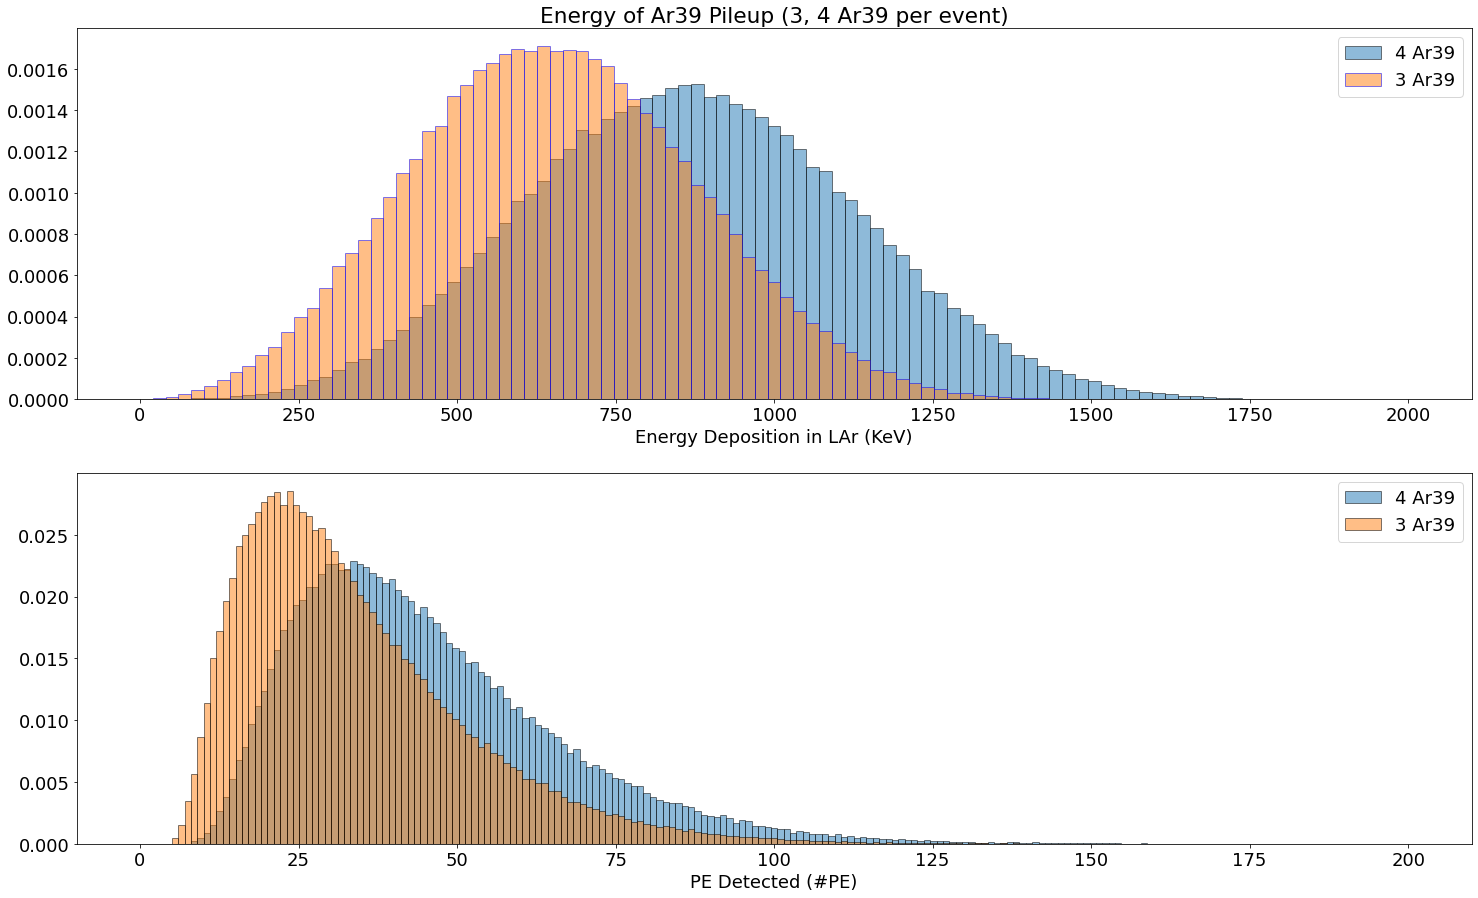

In [31]:
plt.subplot(2,1,1)
plt.title("Energy of Ar39 Pileup (3, 4 Ar39 per event)")
bins = np.linspace(0, 2000, 100)
plt.hist(groupby_event_df4.energydeposition, bins=bins, label="4 Ar39", density=True, edgecolor='k', alpha=0.5)
plt.hist(groupby_event_df3.energydeposition, bins=bins, label="3 Ar39", density=True, edgecolor='b', alpha=0.5)
plt.xlabel("Energy Deposition in LAr (KeV)")
plt.legend()

plt.subplot(2,1,2)
bins = np.linspace(0, 200, 200)
plt.hist(groupby_event_df4.pedetected, bins=bins, label="4 Ar39", density=True, edgecolor='k', alpha=0.5)
plt.hist(groupby_event_df3.pedetected, bins=bins, label="3 Ar39", density=True, edgecolor='k', alpha=0.5)
plt.xlabel("PE Detected (#PE)")
plt.legend()
plt.show()

In [50]:
#TODO: iterrows, for each row pick min max index of active slice (#ops > 0)
#then, compute difference between the min of minimums, and max of maximum
np.nonzero([df.iloc[0, 3:]])[1][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [61]:
std_event_df3 = groupby_event_df3.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)
std_event_df4 = groupby_event_df4.apply(lambda row: np.std(np.nonzero([row[2:]])[1]), axis=1)

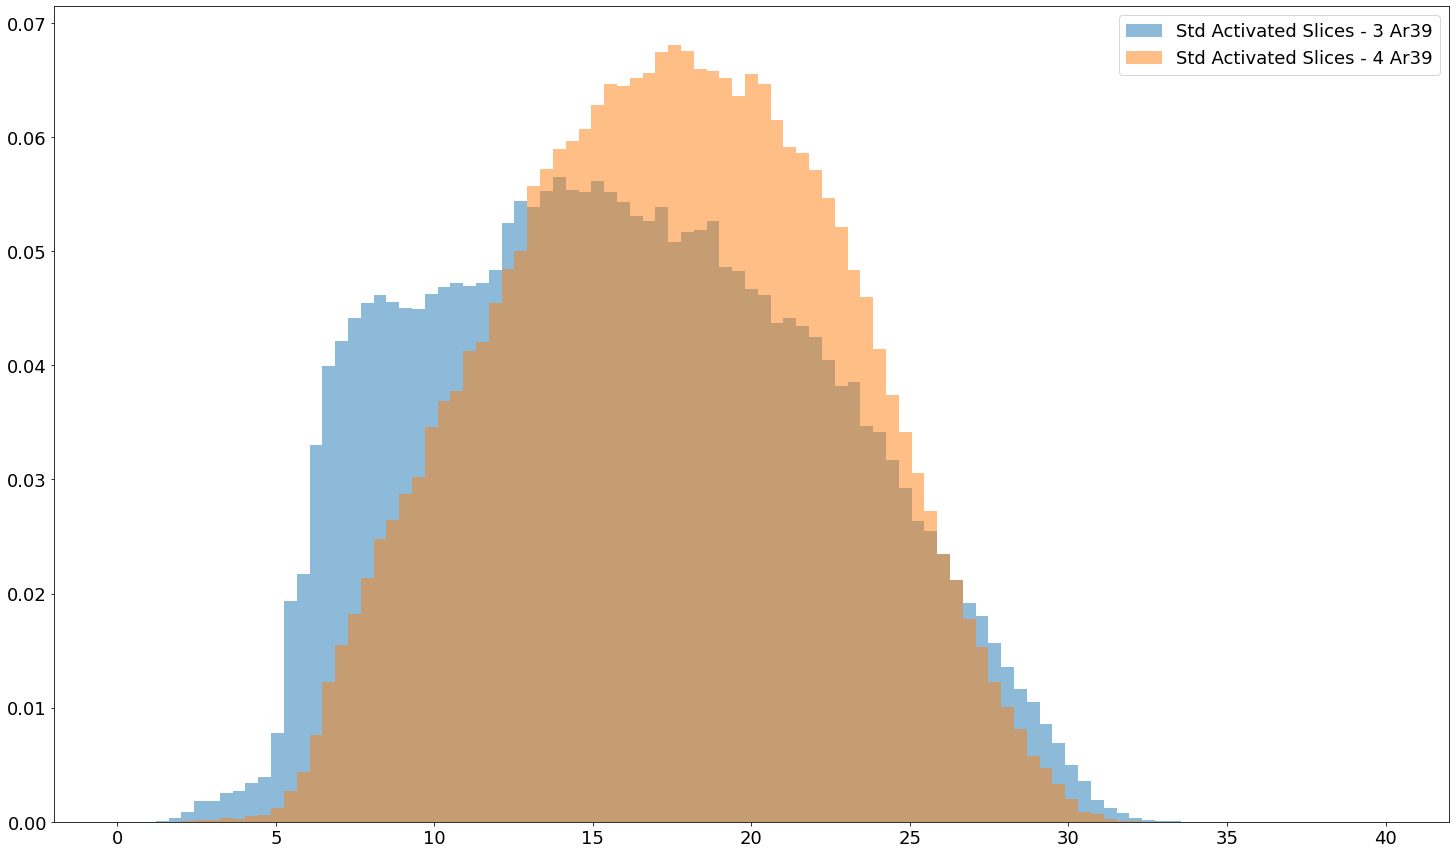

In [66]:
bins = np.linspace(0, 40, 100)
plt.hist(std_event_df3, bins=bins, label="Std Activated Slices - 3 Ar39", density=True, alpha=0.5)
plt.hist(std_event_df4, bins=bins, label="Std Activated Slices - 4 Ar39", density=True, alpha=0.5)
plt.legend()
plt.show()

In [63]:
std_event_df4.describe()

count    172991.000000
mean         17.438317
std           5.229154
min           2.291288
25%          13.558944
50%          17.507006
75%          21.375778
max          32.522108
dtype: float64